Process RTS sample scenarios to understand input-output relationship between RTS scenarios and Vatic outputs:
(i) total daily system costs; (ii) lost load; (iii) renewable curtailment. The aggregated solar, wind, load assets are considered below.

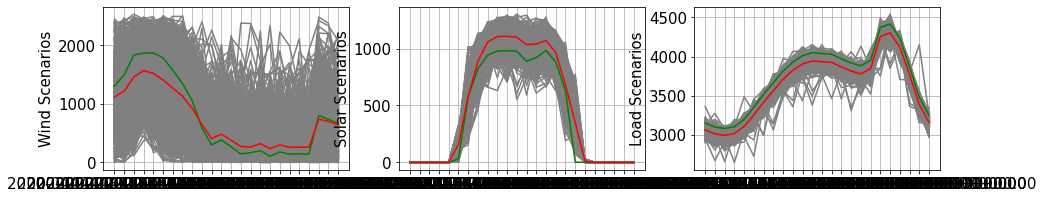

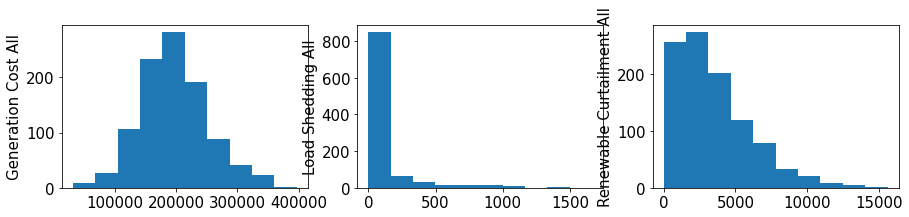

In [1]:
import pandas as pd
import bz2
import dill as pickle
import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy import mean
import numpy as np
import math
pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
Forecast = pd.read_csv("Forecast.csv")
WindForecast=Forecast['WindForecast']
SolarForecast=Forecast['SolarForecast']
LoadForecast=Forecast['LoadForecast']

Mean = pd.read_csv("Mean.csv")
WindMean=Mean['WindMean']
SolarMean=Mean['SolarMean']
LoadMean=Mean['LoadMean']
time= Mean['time']
#print(WindMean)
WindScenarios = pd.read_csv("WindScenariosAggregated.csv")

#WindScenarios=Scenarios['WindScenarios']
SolarScenarios=pd.read_csv("SolarScenariosAggregated.csv")
LoadScenarios=pd.read_csv("LoadScenariosAggregated.csv")
#print(WindScenarios)
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
ax.set_ylabel("Wind Scenarios",fontsize=15)
plt.plot( WindScenarios.T,'gray')
plt.plot(time,WindForecast,'green')
plt.plot(time, WindMean,'r')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,2)
ax.set_ylabel("Solar Scenarios",fontsize=15)
plt.plot(SolarScenarios.T,'gray')
plt.plot(time,SolarForecast,'green')
plt.plot(time, SolarMean,'r')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,3)
ax.set_ylabel("Load Scenarios",fontsize=15)
plt.plot(LoadScenarios.T,'gray')
plt.plot(time,LoadForecast,'green')
plt.plot(time, LoadMean,'r')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

VaticOutput = pd.read_csv("VaticOutput.csv")
GenerationCostAll=VaticOutput['GenerationCostAll']
LoadSheddingAll=VaticOutput['LoadSheddingAll']
RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
#print(GenerationCost)
#print(np.fromiter(GenerationCost, dtype=int))
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
ax.set_ylabel("Generation Cost All",fontsize=15)
ax.hist(GenerationCostAll)
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,2)
ax.set_ylabel("Load Shedding All",fontsize=15)
ax.hist(LoadSheddingAll)
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,3)
ax.set_ylabel("Renewable Curtailment All",fontsize=15)
ax.hist(RenewableCurtailmentAll)
ax.tick_params(labelsize=15)

We consider all load, solar and wind to be stochastic and in that case we try to understand the relationship between the scenarios and the vatic output

The indices of the scenarios which are always above the mean of the scenarios [10, 99, 156, 634, 655, 700, 846, 910]


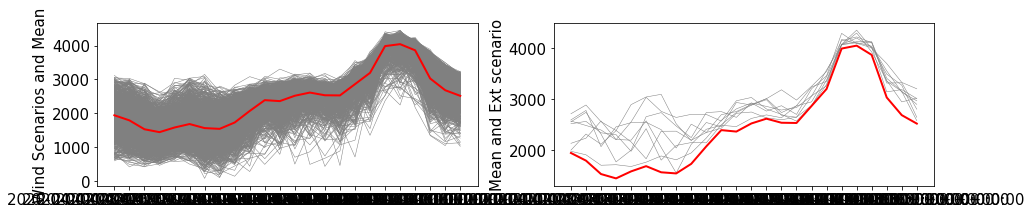

58009.53733880001
The number of scenarios for which the integration sum over 24 hrs are bigger than the integration sum for the mean


Text(0, 0.5, 'Generation cost')

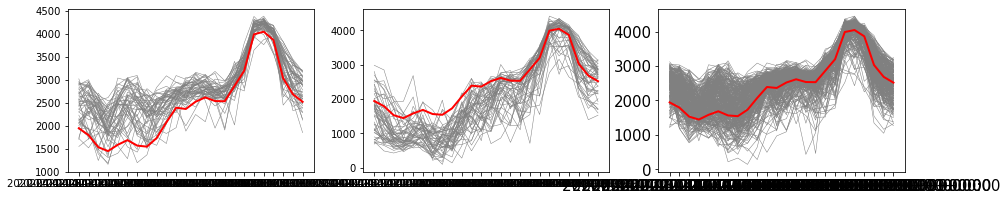

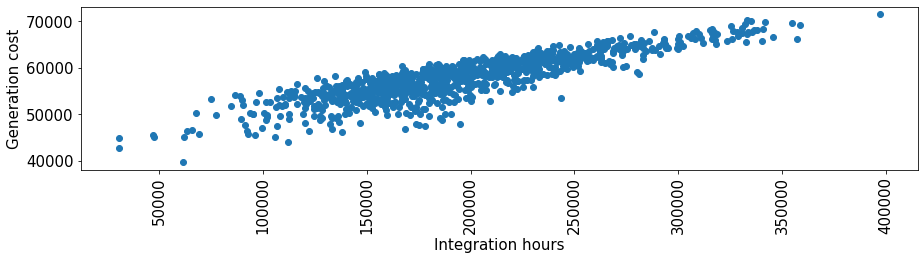

In [2]:
DifferenceLoadWindSolar=LoadScenarios-WindScenarios-SolarScenarios
MeanDiff=mean(DifferenceLoadWindSolar)
#import matplotlib.pyplot as plt

Thresold=MeanDiff
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,2,1)
ax.tick_params(labelsize=15)
ax.set_ylabel("Wind Scenarios and Mean",fontsize=15)
plt.plot(DifferenceLoadWindSolar.T,'gray', label='Difference', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

index=[]
ax = fig.add_subplot(1,2,2)
ax.tick_params(labelsize=15)
ax.set_ylabel("Mean and Ext scenario",fontsize=15)
for k in range(0,1000):
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    check=(ScenArray-Thresold)
    CheckArray=[]
    for t in range(0,24):
        CheckArray.append(check[time[t]])
    if(all(x > 0 for x in CheckArray)):
        plt.plot(time,ScenArray,'gray', label='Scenario', lw=0.5)
        index.append(k)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
print("The indices of the scenarios which are always above the mean of the scenarios",index)
plt.show()
GenCostSortedAll=[]
LoadShedSortedAll=[]
CurtailSortedAll=[]
for i in range(0,1000):
    a=GenerationCostAll[i]
    b=RenewableCurtailmentAll[i]
    GenCostSortedAll.append(a)
    CurtailSortedAll.append(b)

sort_indexGenCostAll = np.argsort(GenCostSortedAll)
#print("Scenario indices that causes highest 5% generation cost:", sort_indexGenCostAll[950:1000])
sort_index_curAll = np.argsort(CurtailSortedAll)
#print("Scenario indices that causes highest 5% renewable curtailment:", sort_index_curAll[950:1000])

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'gray', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

ax = fig.add_subplot(1,3,2)
for k in sort_index_curAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'gray', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

LoadShedSortedAll=[]
for i in range(0,1000):
    a=LoadSheddingAll[i]
    LoadShedSortedAll.append(a)
LoadShedSortedAll=np.nonzero(LoadShedSortedAll)

ax = fig.add_subplot(1,3,3)
for k in LoadShedSortedAll:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'gray', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

ThresoldCompArray=[]
for i in range(0,24):
    ThresoldComp=Thresold[time[i]]
    ThresoldCompArray.append(ThresoldComp)
#print(ThresoldCompArray)
 
SumThresold=np.sum(ThresoldCompArray)
print(SumThresold)
IntegrationScen=[]
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    IntegrationScen.append(np.sum(ScenArray))
#print(IntegrationScen)

print("The number of scenarios for which the integration sum over 24 hrs are bigger than the integration sum for the mean")
sum(i > SumThresold for i in IntegrationScen)

#fig = plt.figure(figsize=(5,4))
ax.tick_params(labelsize=15)
IntegrationScen=[]
ExtScenIdx=[]
for k in sort_indexGenCostAll[0:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    a=np.sum(ScenArray)
    IntegrationScen.append(a)
    ExtScenIdx.append(k)
    #plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
#plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
#print(IntegrationScen)
NumExtScen=sum(i > SumThresold for i in IntegrationScen)
#print(NumExtScen)
HighGenCost=[]
for i in ExtScenIdx:
    HighGenCost.append(GenCostSortedAll[i])
#print("The higher generation cost are:", HighGenCost)
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,1,1)
ax.tick_params(labelsize=15)
plt.scatter(HighGenCost,IntegrationScen)
    
#ax.hist(GenerationCostAll)
#ax.hist(HighGenCost, bins=10,color = "red")
plt.xticks(rotation=90)
ax.set_xlabel("Integration hours",fontsize=15)
ax.set_ylabel("Generation cost",fontsize=15)

The scenario causing the high generation cost, for them the integration of energy generation over 24 hrs are high and above the thresold value.

 We consider only those scenario which has a rapid jump in energy generation from 16th hour to 17th hour. This rapid jump in energy causes the higher generation cost. The scenarios that causes the highest 5% generation cost does not have any connection with the Load shedding or the renewable curtailment though.

We consider those scenarios whose integration value is high (higher than some thresold value)

The indices of the scenarios which are always below the mean [10, 99, 123, 156, 634, 655, 700, 768, 770, 910, 935, 955]


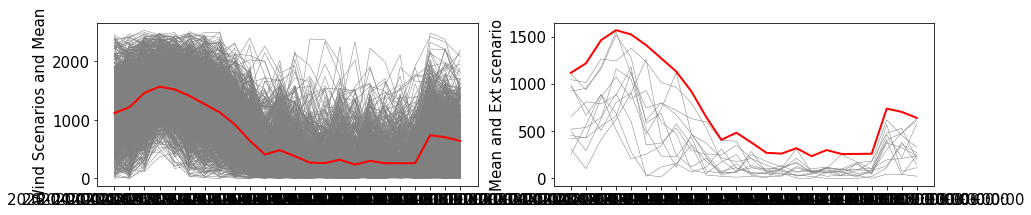

17786.862796200003


Text(0, 0.5, 'Generation cost')

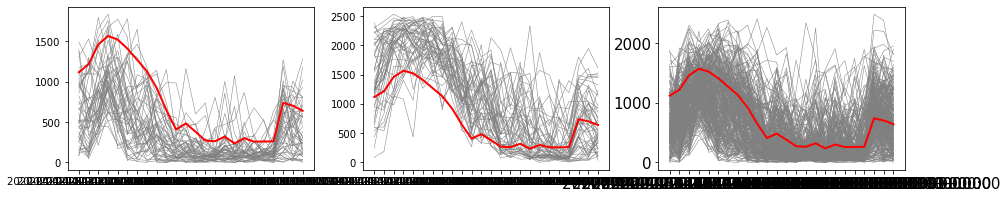

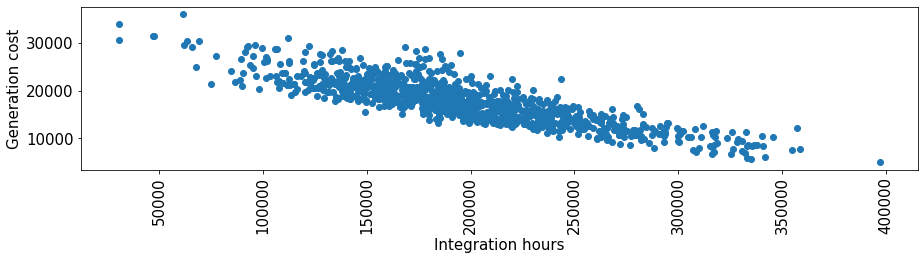

In [3]:
DifferenceLoadWindSolar=WindScenarios
MeanDiff=mean(DifferenceLoadWindSolar)

Thresold=MeanDiff
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,2,1)
ax.tick_params(labelsize=15)
ax.set_ylabel("Wind Scenarios and Mean",fontsize=15)
plt.plot(DifferenceLoadWindSolar.T,'gray', label='Difference', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

index=[]
time=WindScenarios.keys()
ax = fig.add_subplot(1,2,2)
ax.tick_params(labelsize=15)
ax.set_ylabel("Mean and Ext scenario",fontsize=15)
for k in range(0,1000):
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    check=(ScenArray-Thresold)
    CheckArray=[]
    for t in range(0,24):
        CheckArray.append(check[time[t]])
    if(all(x < 0 for x in CheckArray)):
        plt.plot(time,ScenArray,'gray', label='Scenario', lw=0.5)
        index.append(k)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
print("The indices of the scenarios which are always below the mean",index)
plt.show()

GenCostSortedAll=[]
LoadShedSortedAll=[]
CurtailSortedAll=[]
for i in range(0,1000):
    a=GenerationCostAll[i]
    b=RenewableCurtailmentAll[i]
    GenCostSortedAll.append(a)
    CurtailSortedAll.append(b)
#GenCostSorted.sort(reverse=True)
#print(GenCostSorted)

sort_indexGenCostAll = np.argsort(GenCostSortedAll)
#print("Scenario indices that causes highest 5% generation cost:", sort_indexGenCostAll[950:1000])
sort_index_curAll = np.argsort(CurtailSortedAll)
#print("Scenario indices that causes highest 5% renewable curtailment:", sort_index_curAll[950:1000])

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'gray', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

ax = fig.add_subplot(1,3,2)
for k in sort_index_curAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'gray', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

LoadShedSortedAll=[]
for i in range(0,1000):
    a=LoadSheddingAll[i]
    LoadShedSortedAll.append(a)
LoadShedSortedAll=np.nonzero(LoadShedSortedAll)

ax = fig.add_subplot(1,3,3)
for k in LoadShedSortedAll:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'gray', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

ThresoldCompArray=[]
for i in range(0,24):
    ThresoldComp=Thresold[time[i]]
    ThresoldCompArray.append(ThresoldComp)
#print(ThresoldCompArray)

SumThresold=np.sum(ThresoldCompArray)
print(SumThresold)
IntegrationScen=[]
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    IntegrationScen.append(np.sum(ScenArray))
#print(IntegrationScen)

sum(i > SumThresold for i in IntegrationScen)

#fig = plt.figure(figsize=(5,4))
ax.tick_params(labelsize=15)
IntegrationScen=[]
ExtScenIdx=[]
for k in sort_indexGenCostAll[0:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    a=np.sum(ScenArray)
    IntegrationScen.append(a)
    ExtScenIdx.append(k)
    #plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
#plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
#print(IntegrationScen)
NumExtScen=sum(i > SumThresold for i in IntegrationScen)
#print(NumExtScen)
HighGenCost=[]
for i in ExtScenIdx:
    HighGenCost.append(GenCostSortedAll[i])
#print("The higher generation cost are:", HighGenCost)
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,1,1)
ax.tick_params(labelsize=15)
plt.scatter(HighGenCost,IntegrationScen)
#ax.hist(GenerationCostAll)
#ax.hist(HighGenCost, bins=10,color = "red")
plt.xticks(rotation=90)
ax.set_xlabel("Integration hours",fontsize=15)
ax.set_ylabel("Generation cost",fontsize=15)

[]


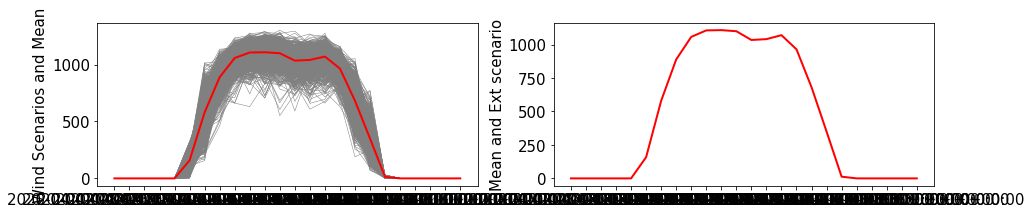

11146.647932400005


Text(0, 0.5, 'Generation cost')

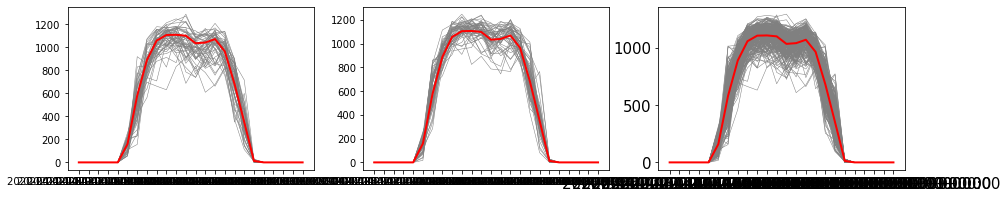

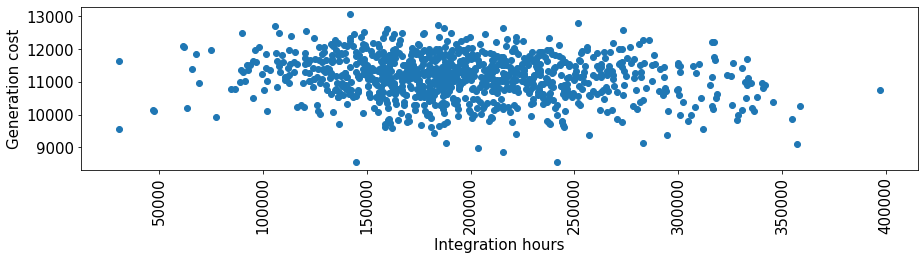

In [4]:
DifferenceLoadWindSolar=SolarScenarios
MeanDiff=mean(DifferenceLoadWindSolar)

Thresold=MeanDiff
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,2,1)
ax.tick_params(labelsize=15)
ax.set_ylabel("Wind Scenarios and Mean",fontsize=15)
plt.plot(DifferenceLoadWindSolar.T,'gray', label='Difference', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

index=[]
time=WindScenarios.keys()
ax = fig.add_subplot(1,2,2)
ax.tick_params(labelsize=15)
ax.set_ylabel("Mean and Ext scenario",fontsize=15)
for k in range(0,1000):
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    check=(ScenArray-Thresold)
    CheckArray=[]
    for t in range(0,24):
        CheckArray.append(check[time[t]])
    if(all(x > 0 for x in CheckArray)):
        plt.plot(time,ScenArray,'gray', label='Scenario', lw=0.5)
        index.append(k)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
print(index)
plt.show()

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'gray', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

ax = fig.add_subplot(1,3,2)
for k in sort_index_curAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'gray', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

LoadShedSortedAll=[]
for i in range(0,1000):
    a=LoadSheddingAll[i]
    LoadShedSortedAll.append(a)
LoadShedSortedAll=np.nonzero(LoadShedSortedAll)

ax = fig.add_subplot(1,3,3)
for k in LoadShedSortedAll:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'gray', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

ThresoldCompArray=[]
for i in range(0,24):
    ThresoldComp=Thresold[time[i]]
    ThresoldCompArray.append(ThresoldComp)
#print(ThresoldCompArray)
 
SumThresold=np.sum(ThresoldCompArray)
print(SumThresold)
IntegrationScen=[]
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    IntegrationScen.append(np.sum(ScenArray))
#print(IntegrationScen)

sum(i > SumThresold for i in IntegrationScen)

#fig = plt.figure(figsize=(5,4))
ax.tick_params(labelsize=15)
IntegrationScen=[]
ExtScenIdx=[]
for k in sort_indexGenCostAll[0:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    a=np.sum(ScenArray)
    IntegrationScen.append(a)
    ExtScenIdx.append(k)
    #plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
#plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
#print(IntegrationScen)
NumExtScen=sum(i > SumThresold for i in IntegrationScen)
#print(NumExtScen)
HighGenCost=[]
for i in ExtScenIdx:
    HighGenCost.append(GenCostSortedAll[i])
#print("The higher generation cost are:", HighGenCost)
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,1,1)
ax.tick_params(labelsize=15)
plt.scatter(HighGenCost,IntegrationScen)
#ax.hist(GenerationCostAll)
#ax.hist(HighGenCost, bins=10,color = "red")
plt.xticks(rotation=90)
ax.set_xlabel("Integration hours",fontsize=15)
ax.set_ylabel("Generation cost",fontsize=15)

(array([], dtype=int64),)
[184, 119, 34, 5, 34, 77, 20, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]


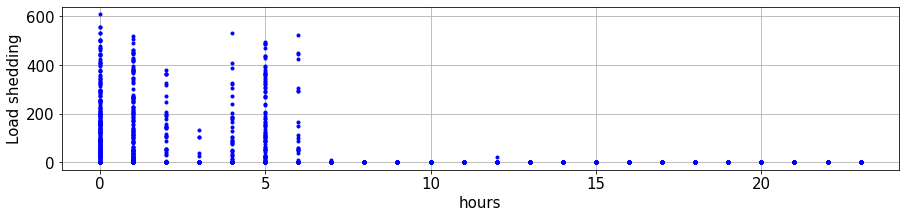

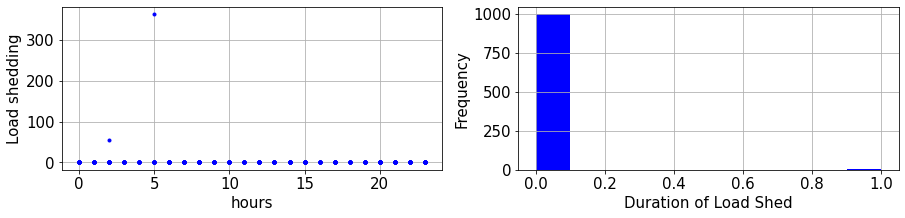

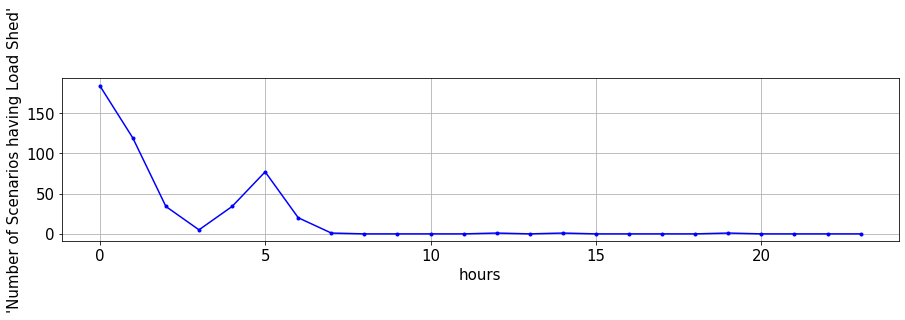

In [5]:
LoadShedHour = pd.read_csv("LoadShedHour.csv")
hours=LoadShedHour['hours']
LoadShed=LoadShedHour['LoadShed']

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,1,1)
ax.set_ylabel("Load shedding",fontsize=15)
ax.set_xlabel("hours",fontsize=15)
plt.plot(hours,LoadShed,'.b', label='Scenario', lw=0.5)
plt.show
plt.grid()
ax.tick_params(labelsize=15)

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,2,1)
ax.set_ylabel("Load shedding",fontsize=15)
ax.set_xlabel("hours",fontsize=15)
DurationLoadShed=[]
for k in LoadShedSortedAll:
    plt.plot(hours[k],LoadShed[k],'.b', label='Scenario', lw=0.5)
    plt.show
    plt.grid()
    ax.tick_params(labelsize=15)
for i in range(0,1000):
    a=LoadShed[i]
    d=np.count_nonzero(a) 
    DurationLoadShed.append(d)
ax = fig.add_subplot(1,2,2)
ax.set_ylabel("Frequency",fontsize=15)
ax.set_xlabel("Duration of Load Shed",fontsize=15)
ax.hist(DurationLoadShed, bins=10,color = "b")
plt.show
plt.grid()
ax.tick_params(labelsize=15)

array2 = np.nonzero(DurationLoadShed)
b=np.array(DurationLoadShed)[np.array(DurationLoadShed)>4]
ExtIdx=np.where(np.array(DurationLoadShed)>3)
print(ExtIdx)

NumScen=[]
for i in range(0,24):
    a=np.where(np.array(hours)==i)
    #print(a)
    #print(len(sum(np.nonzero(np.array(LoadShed)[a]))))
    NumScen.append(len(sum(np.nonzero(np.array(LoadShed)[a]))))
print(NumScen)
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,1,1)
ax.set_ylabel("'Number of Scenarios having Load Shed'",fontsize=15)
ax.set_xlabel("hours",fontsize=15)
plt.plot(NumScen,'.-b', label='Number of Scenarios having Load Shed', lw=1.5)
plt.show
plt.grid()
ax.tick_params(labelsize=15)